# Mounting Google Drive

In [ ]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Folder Structure

In [ ]:
print('''
In this project we have folder structure like this
preprocessing/           # Preprocessed data
    original/            # Step 1: Raw images, untouched
        class_0/
        class_1/
    splitted/            # Step 2:Split 70 % train, 15 % test, 15 % validation
        train/
          class_0/
          class_1/
        test/
          class_0/
          class_1/
        validation/
          class_0/
          class_1/
    augmented_train/  # Step 3: Augmentasi
        major_class/
        minor_class/

Note : Folder structure ini hanya berlaku jika terdapat class imbalance
''')


In this project we have folder structure like this
preprocessing/           # Preprocessed data
    original/            # Step 1: Raw images, untouched
        class_0/
        class_1/
    splitted/            # Step 2:Split 70 % train, 15 % test, 15 % validation
        train/
          class_0/
          class_1/
        test/
          class_0/
          class_1/
        validation/
          class_0/
          class_1/
    augmented_train/  # Step 3: Augmentasi
        major_class/
        minor_class/

Note : Folder structure ini hanya berlaku jika terdapat class imbalance



# Get Drive Path

In [ ]:
import os

drive_path = "/content/drive/MyDrive/Datasets/Brain Tumor Dataset"

target_folder = os.listdir(drive_path)

target_folder

['Brain Tumor', 'Healthy']

# Get Folder

In [ ]:
tumor = os.path.join(drive_path, target_folder[0])
healthy = os.path.join(drive_path, target_folder[1])

In [ ]:
print(f"Tumor :{len(os.listdir(tumor))} files\nHealthy:{len(os.listdir(healthy))} files")

Tumor :2513 files
Healthy:2087 files


# Check Imbalance

## Count Imbalance

In [ ]:
total_tumor = len(os.listdir(tumor))
total_healthy = len(os.listdir(healthy))
print(f"Difference : {abs(total_tumor-total_healthy)} files")

Difference : 426 files


## Check Imbalance Ratio

In [ ]:
from IPython.display import display, Math

# Display the LaTeX formula
display(Math(r'\text{Imbalance Ratio} = \frac{\text{Size of Smaller Class}}{\text{Size of Larger Class}}'))


<IPython.core.display.Math object>

In [ ]:
def ratio(min_value, max_value):
  ratio = max_value/min_value
  print(f"Imbalance Ratio {ratio:.2f}")
  if ratio >= 1.0 and ratio <= 1.5 :
    print("No Action - Mild Imbalance")
  elif ratio > 1.5 and ratio <= 2.0 :
    print("Light down/up sampling")
  elif ratio > 2.0 and ratio <= 2.5 :
    print("Aggresive down/up sampling")


def check_ratio(classes):
  min_val = 0
  max_val = 0
  if len(classes) >= 0 and len(classes) <= 1 :
    print("Error ! minimum 2 classes")
  elif len(classes) >= 2:
    min_val = min(classes)
    max_val = max(classes)

  ratio(min_val,max_val)

In [ ]:
sizes = [total_tumor, total_healthy]
check_ratio(sizes)

Imbalance Ratio 1.20
No Action - Mild Imbalance


# Get Random 4 Images

## Tumor Brain

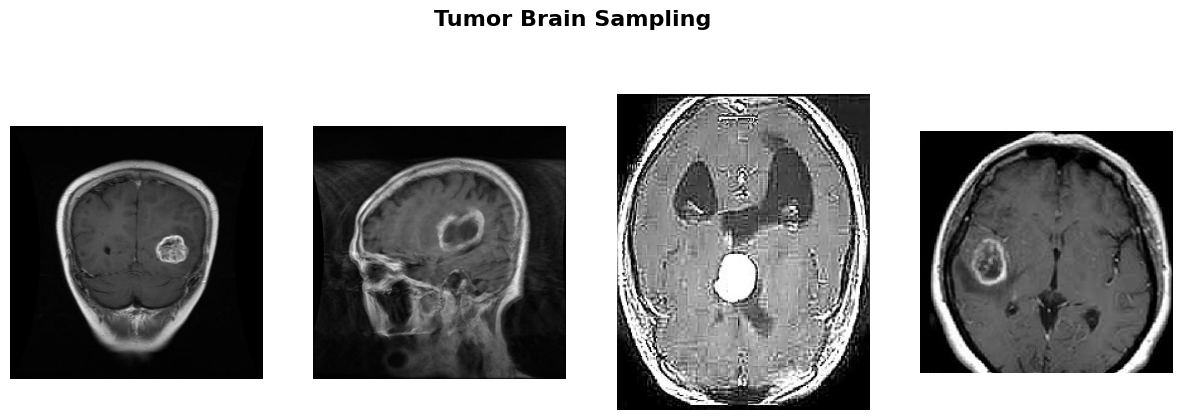

In [ ]:
from PIL import Image
import random
import os
import matplotlib.pyplot as plt

def random_files(folder_path, num_files=4):
  files = os.listdir(folder_path)
  num_files = min(num_files, len(files))
  sample_data = random.sample(files, num_files)
  return sample_data

def show_image(folder_path):
  file_sample = random_files(folder_path)

  fig, axes = plt.subplots(1, len(file_sample), figsize=(15, 5))

  for i, f in enumerate(file_sample):
      image_path = os.path.join(folder_path, f)
      img = Image.open(image_path)
      axes[i].imshow(img)
      axes[i].axis('off')
  plt.suptitle("Tumor Brain Sampling", fontsize=16, fontweight='bold')
  plt.show()


folder_path = tumor
show_image(folder_path)

## Healthy Brain

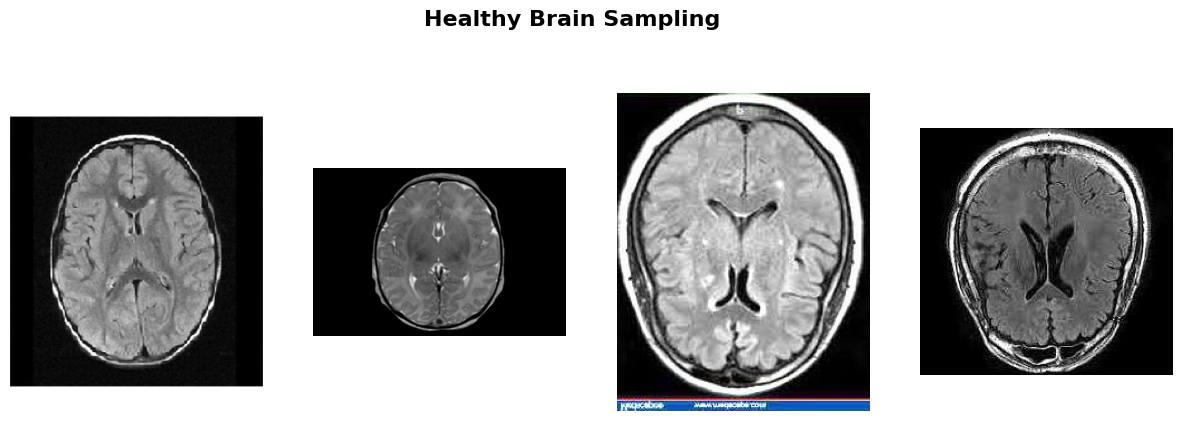

In [ ]:
from PIL import Image
import random
import os
import matplotlib.pyplot as plt

def random_files(folder_path, num_files=4):
  files = os.listdir(folder_path)
  num_files = min(num_files, len(files))
  sample_data = random.sample(files, num_files)
  return sample_data

def show_image(folder_path):
  file_sample = random_files(folder_path)

  fig, axes = plt.subplots(1, len(file_sample), figsize=(15, 5))

  for i, f in enumerate(file_sample):
      image_path = os.path.join(folder_path, f)
      img = Image.open(image_path)
      axes[i].imshow(img)
      axes[i].axis('off')
  plt.suptitle("Healthy Brain Sampling", fontsize=16, fontweight='bold')
  plt.show()


folder_path = healthy
show_image(folder_path)

# Preprocessing

## Folder Structure

In [ ]:
import shutil

root = "/content/"
folder_name = "preprocessed"
preprocessed_path = os.path.join(root, folder_name)

if os.path.exists(preprocessed_path):

    shutil.rmtree(preprocessed_path)
    print(f"Folder '{folder_name}' has been reset (contents deleted).")


os.makedirs(preprocessed_path)
print(f"Folder '{folder_name}' created successfully.")

Folder 'preprocessed' created successfully.


In [ ]:
import os
import shutil

root = "/content/preprocessed"
folder_name = "original"
folder = os.path.join(root, folder_name)

if os.path.exists(folder):
  shutil.rmtree(folder)
  print(f"Folder '{folder_name}' has been reset (contents deleted).\n")
os.makedirs(folder)
print(f"Folder '{folder}' created successfully.\n")

Folder '/content/preprocessed/original' created successfully.



In [ ]:
import os
import shutil

for i in range(len(target_folder)):
    root = "/content/preprocessed/original"
    source_path = os.path.join(drive_path, target_folder[i])
    folder_name = target_folder[i]
    target_path = os.path.join(root, folder_name)
    print(source_path)
    # Debugging: Check paths
    print(f"Source Path: {source_path}, size {len(os.listdir(source_path))} files")
    print(f"Target Path: {target_path}\n")


    if os.path.exists(target_path):
        shutil.rmtree(target_path)
        print(f"Folder '{folder_name}' has been reset (contents deleted).")

    os.makedirs(target_path)

    try:
        # Ensure source_path is a string and is a valid directory
        if isinstance(source_path, str) and os.path.isdir(source_path):
            for file_name in os.listdir(source_path):
                new_file_path = os.path.join(source_path, file_name)
                if os.path.isfile(new_file_path):
                    shutil.copy(new_file_path, target_path)
            print(f"Contents of '{folder_name}' copied successfully.\n")
        else:
            print(f"Error: Invalid source path '{source_path}'\n")
    except Exception as e:
        print(f"Error copying contents from '{source_path}' to '{target_path}': {e}\n")

/content/drive/MyDrive/Datasets/Brain Tumor Dataset/Brain Tumor
Source Path: /content/drive/MyDrive/Datasets/Brain Tumor Dataset/Brain Tumor, size 2513 files
Target Path: /content/preprocessed/original/Brain Tumor

Contents of 'Brain Tumor' copied successfully.

/content/drive/MyDrive/Datasets/Brain Tumor Dataset/Healthy
Source Path: /content/drive/MyDrive/Datasets/Brain Tumor Dataset/Healthy, size 2087 files
Target Path: /content/preprocessed/original/Healthy

Contents of 'Healthy' copied successfully.



# Train (70%), Test (15%), Validation(15%)

## Splitting

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
original_folder = "/content/preprocessed/original"
splitted_folder = "/content/preprocessed/splitted"

# Ensure the target 'splitted' folder exists
if not os.path.exists(splitted_folder):
    os.makedirs(splitted_folder)

# Classes (subfolders in original folder)
classes = os.listdir(original_folder)

# Folder names for splits
splits = ["train", "test", "validation"]

# Ensure 'train', 'test', 'validation' folders exist for each class
for class_name in classes:
    for split in splits:
        split_path = os.path.join(splitted_folder, split, class_name)
        if os.path.exists(split_path):
            shutil.rmtree(split_path)
            print(f"Folder '{split_path}' has been reset (contents deleted).")
        os.makedirs(split_path)
        print(f"Folder '{split_path}' created successfully.")

# Split data for each class
for class_name in classes:
    # Source path for the current class
    source_path = os.path.join(original_folder, class_name)
    all_files = os.listdir(source_path)

    # Split into train (70%), test (15%), and validation (15%)
    train_files, temp_files = train_test_split(all_files, test_size=0.3, random_state=42)
    test_files, val_files = train_test_split(temp_files, test_size=0.5, random_state=42)

    # Move files to respective folders
    for file in train_files:
        shutil.copy(os.path.join(source_path, file), os.path.join(splitted_folder, "train", class_name, file))

    for file in test_files:
        shutil.copy(os.path.join(source_path, file), os.path.join(splitted_folder, "test", class_name, file))

    for file in val_files:
        shutil.copy(os.path.join(source_path, file), os.path.join(splitted_folder, "validation", class_name, file))

    print(f"Class '{class_name}' split into train: {len(train_files)}, test: {len(test_files)}, validation: {len(val_files)}.")


Folder '/content/preprocessed/splitted/train/Healthy' created successfully.
Folder '/content/preprocessed/splitted/test/Healthy' created successfully.
Folder '/content/preprocessed/splitted/validation/Healthy' created successfully.
Folder '/content/preprocessed/splitted/train/Brain Tumor' created successfully.
Folder '/content/preprocessed/splitted/test/Brain Tumor' created successfully.
Folder '/content/preprocessed/splitted/validation/Brain Tumor' created successfully.
Class 'Healthy' split into train: 1460, test: 313, validation: 314.
Class 'Brain Tumor' split into train: 1759, test: 377, validation: 377.


## Data Augmentation

In [ ]:
!pip install tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from sklearn.utils import class_weight
import tensorflow as tf


train_folder = "/content/preprocessed/splitted/train"
augmented_folder = "/content/preprocessed/train_augmented"

# Ensure augmented folder exists
if os.path.exists(augmented_folder):
    shutil.rmtree(augmented_folder)
    print(f"Folder '{augmented_folder}' has been reset (contents deleted).")
os.makedirs(augmented_folder)
print(f"Folder '{augmented_folder}' created successfully.")

# Augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest"
)

# Balancing: Count files in each class
class_counts = {}
for class_name in os.listdir(train_folder):
    class_path = os.path.join(train_folder, class_name)
    class_counts[class_name] = len(os.listdir(class_path))

# Determine the majority class size
max_count = max(class_counts.values())
print(f"Class distribution before augmentation: {class_counts}")
print(f"Target size for all classes: {max_count}")

# Augment each class
for class_name, count in class_counts.items():
    class_path = os.path.join(train_folder, class_name)
    target_class_path = os.path.join(augmented_folder, class_name)

    # Ensure target class folder exists
    os.makedirs(target_class_path, exist_ok=True)

    # Copy original images to augmented folder
    for file_name in os.listdir(class_path):
        shutil.copy(os.path.join(class_path, file_name), os.path.join(target_class_path, file_name))

    # Augment if the class is smaller than the majority class
    if count < max_count:
        files = os.listdir(class_path)
        augment_count = max_count - count
        print(f"Augmenting class '{class_name}' with {augment_count} additional images.")

        for i in range(augment_count):
            img_name = files[i % count]  # Loop through original files
            img_path = os.path.join(class_path, img_name)

            # Load image
            img = tf.keras.preprocessing.image.load_img(img_path) # Use tf here
            x = tf.keras.preprocessing.image.img_to_array(img)
            x = x.reshape((1,) + x.shape)

            # Generate and save augmented image
            batch = next(datagen.flow(x, batch_size=1))
            aug_img_name = f"aug_{i}_{img_name}"
            aug_img_path = os.path.join(target_class_path, aug_img_name)
            tf.keras.preprocessing.image.save_img(aug_img_path, batch[0])

print(f"Augmentation completed. Augmented folder: {augmented_folder}")

Folder '/content/preprocessed/train_augmented' created successfully.
Class distribution before augmentation: {'Healthy': 1460, 'Brain Tumor': 1759}
Target size for all classes: 1759
Augmenting class 'Healthy' with 299 additional images.
Augmentation completed. Augmented folder: /content/preprocessed/train_augmented


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_dir = "/content/preprocessed/train_augmented"  # Augmented training set
val_dir = "/content/preprocessed/splitted/validation"  # Validation set
test_dir = "/content/preprocessed/splitted/test"  # Test set

# Image preprocessing parameters
target_size = (224, 224)
batch_size = 32

# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

# Load and preprocess datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

print("Preprocessing completed.")


Found 3518 images belonging to 2 classes.
Found 691 images belonging to 2 classes.
Found 690 images belonging to 2 classes.
Preprocessing completed.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model


base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))


base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
output = Dense(2, activation="softmax")(x)

# Compile the model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

print("Model created successfully.")

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Model created successfully.


In [ ]:
!nvidia-smi

Thu Jan 16 08:34:46 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0              28W /  70W |    135MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss") # Changed the filepath to best_model.keras
]

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks
)

print("Model training completed.")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


110/110 ━━━━━━━━━━━━━━━━━━━━ 101s 635ms/step - accuracy: 0.5219 - loss: 0.6938 - val_accuracy: 0.5456 - val_loss: 0.6927
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 46s 392ms/step - accuracy: 0.4817 - loss: 0.6952 - val_accuracy: 0.4544 - val_loss: 0.6933
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 80s 376ms/step - accuracy: 0.5187 - loss: 0.6934 - val_accuracy: 0.5456 - val_loss: 0.6906
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 82s 372ms/step - accuracy: 0.5117 - loss: 0.6940 - val_accuracy: 0.4544 - val_loss: 0.6935
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 44s 364ms/step - accuracy: 0.4912 - loss: 0.6938 - val_accuracy: 0.4544 - val_loss: 0.6972
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 45s 377ms/step - accuracy: 0.5089 - loss: 0.6931 - val_accuracy: 0.4544 - val_loss: 0.6944
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 44s 374ms/step - accuracy: 0.4996 - loss: 0.6938 - val_accuracy: 0.5456 - val_loss: 0.6929
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 82s 379ms/step - accuracy: 0.4951 - loss: 0.6936 - va

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 420ms/step - accuracy: 0.8462 - loss: 0.6706
Test Loss: 0.6905295848846436
Test Accuracy: 0.5463768243789673


In [ ]:
# Get the final metrics
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Calculate the gaps
accuracy_gap = abs(train_acc - val_acc)
loss_gap = abs(train_loss - val_loss)

print(f"Accuracy Gap: {accuracy_gap:.2f}")
print(f"Loss Gap: {loss_gap:.2f}")

Accuracy Gap: 0.05
Loss Gap: 0.00


In [ ]:
# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Fine-tune the model
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)

print("Fine-tuning completed.")

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 187s 939ms/step - accuracy: 0.5019 - loss: 0.8182 - val_accuracy: 0.4544 - val_loss: 0.7156
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 102s 408ms/step - accuracy: 0.6772 - loss: 0.5925 - val_accuracy: 0.5065 - val_loss: 0.6927
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 82s 407ms/step - accuracy: 0.7718 - loss: 0.4788 - val_accuracy: 0.5340 - val_loss: 0.6995
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 49s 422ms/step - accuracy: 0.8164 - loss: 0.3961 - val_accuracy: 0.5818 - val_loss: 0.6482
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 82s 422ms/step - accuracy: 0.8473 - loss: 0.3454 - val_accuracy: 0.6802 - val_loss: 0.5540
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 82s 427ms/step - accuracy: 0.8804 - loss: 0.3050 - val_accuracy: 0.7453 - val_loss: 0.4398
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 83s 428ms/step - accuracy: 0.9067 - loss: 0.2425 - val_accuracy: 0.8900 - val_loss: 0.2970
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 81s 419ms/step - accuracy: 0.9202 - loss:

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 276ms/step - accuracy: 0.9444 - loss: 0.1219
Test Loss: 0.12013758718967438
Test Accuracy: 0.9492753744125366


In [ ]:
# Get the final metrics
train_acc = history_finetune.history['accuracy'][-1]
val_acc = history_finetune.history['val_accuracy'][-1]
train_loss = history_finetune.history['loss'][-1]
val_loss = history_finetune.history['val_loss'][-1]

# Calculate the gaps
accuracy_gap = abs(train_acc - val_acc)
loss_gap = abs(train_loss - val_loss)

print(f"Accuracy Gap: {accuracy_gap:.2f}")
print(f"Loss Gap: {loss_gap:.2f}")

Accuracy Gap: 0.00
Loss Gap: 0.03


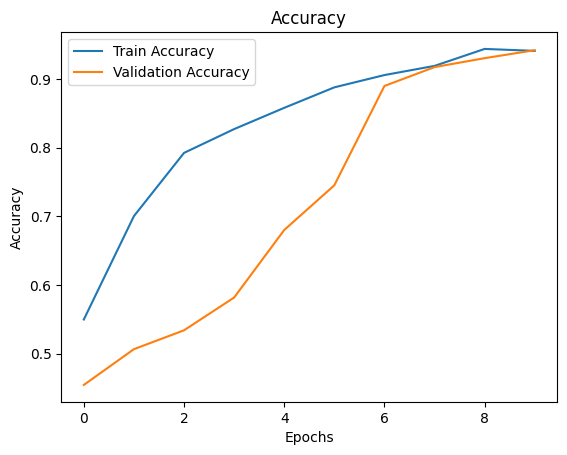

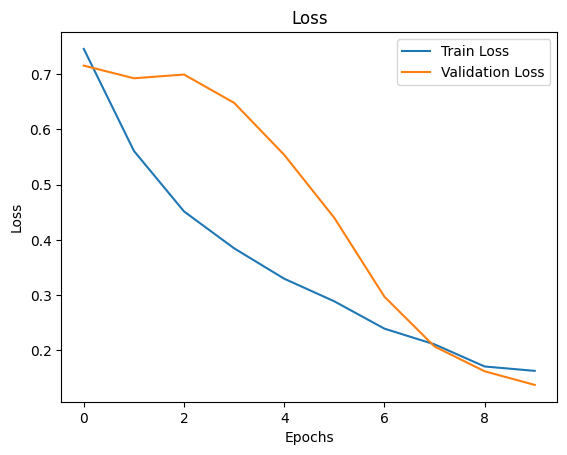

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history_finetune.history['loss'], label='Train Loss')
plt.plot(history_finetune.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Save the entire model to a file
model.save("fine_tuned_model.h5")
print("Model saved successfully as 'fine_tuned_model.h5'")

Model saved successfully as 'fine_tuned_model.h5'


In [ ]:
# Save the model weights
model.save_weights("fine_tuned_weights.weights.h5")  # Changed the filename
print("Model weights saved successfully as 'fine_tuned_weights.weights.h5'")

Model weights saved successfully as 'fine_tuned_weights.weights.h5'


Random Images: ['/content/drive/MyDrive/Datasets/Brain Tumor Dataset/Brain Tumor/Cancer (60).tif', '/content/drive/MyDrive/Datasets/Brain Tumor Dataset/Brain Tumor/Cancer (976).JPG', '/content/drive/MyDrive/Datasets/Brain Tumor Dataset/Brain Tumor/Cancer (1471).jpg', '/content/drive/MyDrive/Datasets/Brain Tumor Dataset/Brain Tumor/Cancer (619).jpg', '/content/drive/MyDrive/Datasets/Brain Tumor Dataset/Brain Tumor/Cancer (2301).jpg']
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


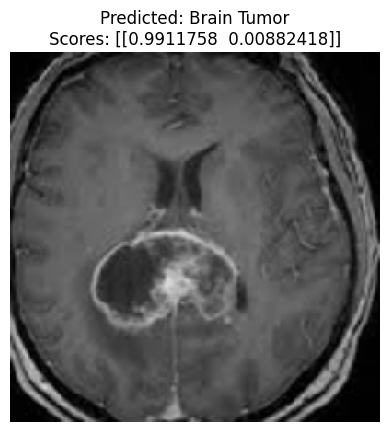

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


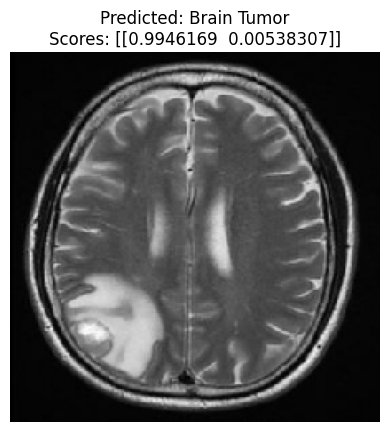

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


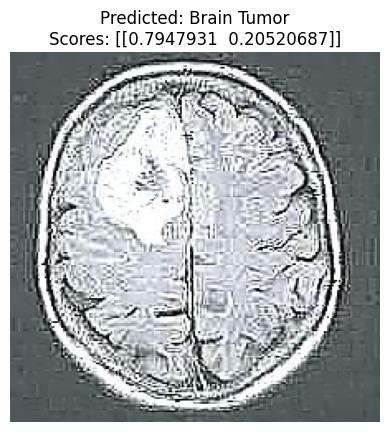

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


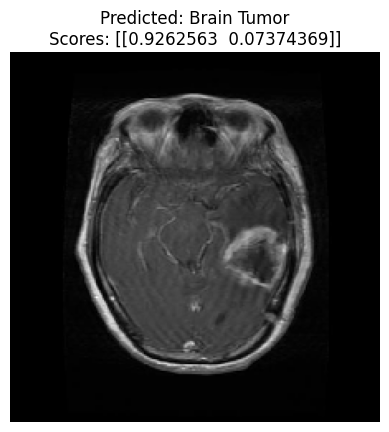

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


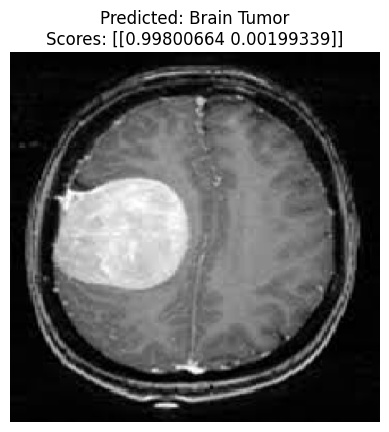

In [ ]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Path to the Siirt Pistachio directory
tumor_dir = "/content/drive/MyDrive/Datasets/Brain Tumor Dataset/Brain Tumor"

# Function to get random images
def get_random_images(directory, num_images=1):
    # List all files in the directory
    files = [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]

    if not files:
        print("No files found in the directory.")
        return []  # Return an empty list if no files are found

    # Randomly select the specified number of files
    random_files = random.sample(files, min(len(files), num_images))
    return [os.path.join(directory, file) for file in random_files]

# Load the trained model
model = load_model("fine_tuned_model.h5")  # Replace with your model's file path

# Assuming train_generator is already defined during training
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # Reverse mapping

# Get random images
random_image_paths = get_random_images(siirt_dir, num_images=5)  # Change num_images as needed
print(f"Random Images: {random_image_paths}")

# Predict and visualize results
for img_path in random_image_paths:
    # Load and preprocess the image
    img = load_img(img_path, target_size=(224, 224))  # Resize to match model input size
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # Get the index of the highest score
    predicted_label = class_labels[predicted_class]  # Map index to class name

    # Visualize the image with the prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}\nScores: {predictions}")
    plt.axis("off")
    plt.show()